In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving delivery_time.csv to delivery_time.csv


In [5]:
data = pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [6]:
df = data.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [10]:
data[data.duplicated()].shape

(0, 2)

In [11]:
data[data.duplicated()]

,Delivery Time,Sorting Time


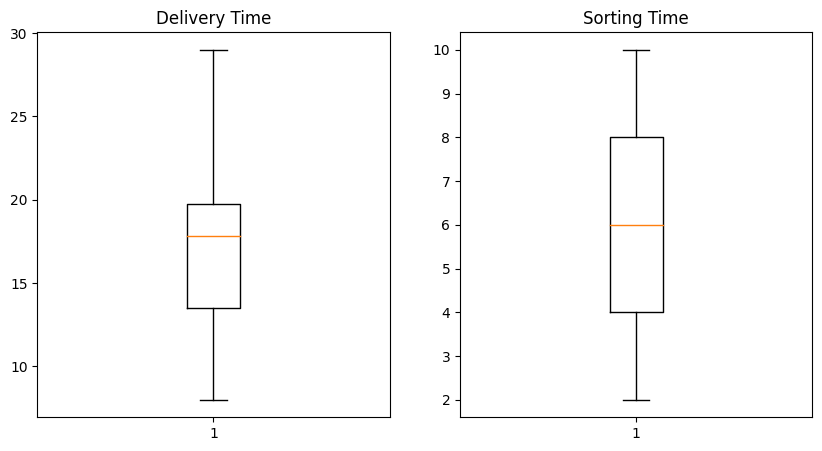

In [12]:
plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.boxplot(data['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(data['Sorting Time'])
plt.title('Sorting Time')
plt.show()

In [13]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

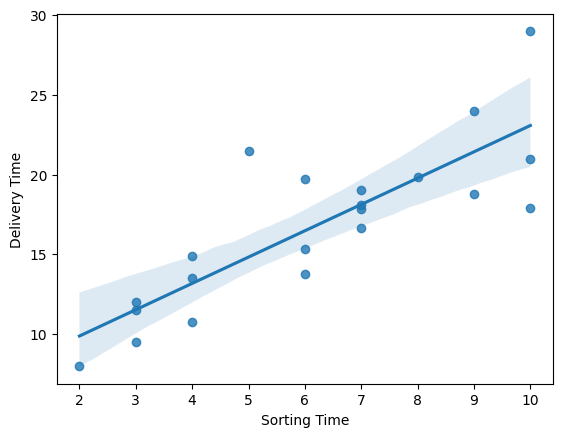

In [14]:
sns.regplot(x=data['Sorting Time'],y=data['Delivery Time'])

**There is good correlation between the two variable.**

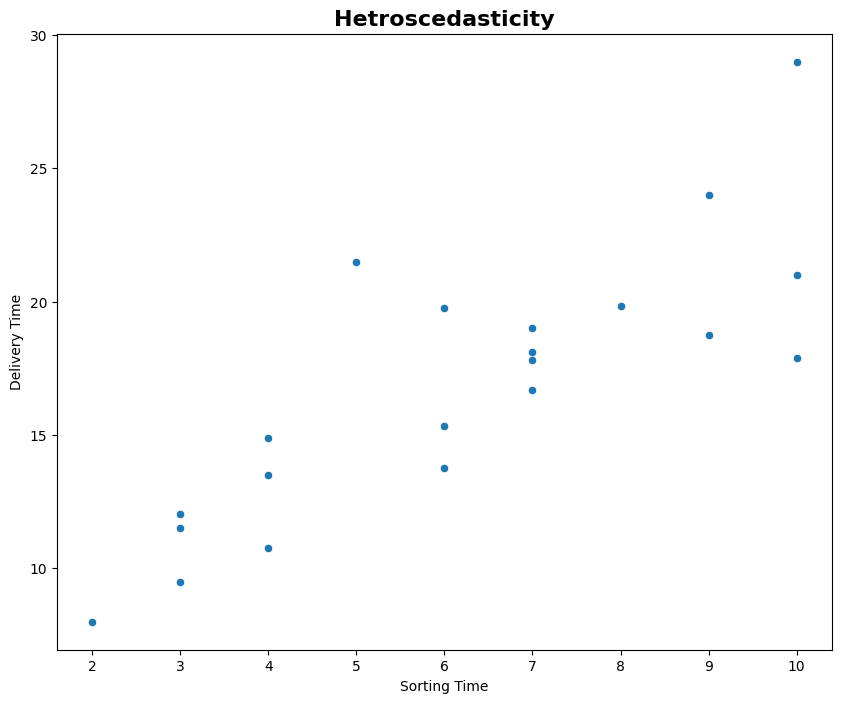

In [15]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = data['Sorting Time'], y = data['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [16]:
data.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

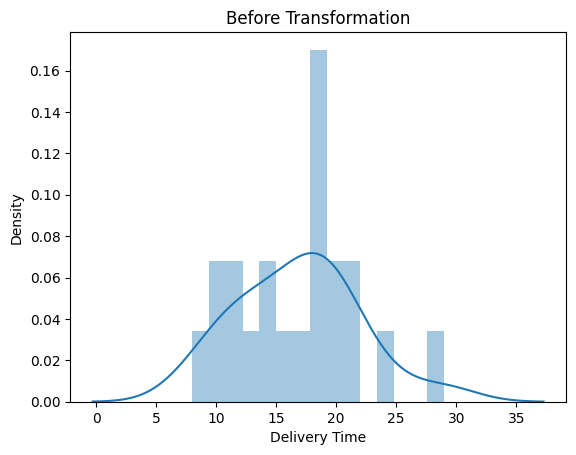

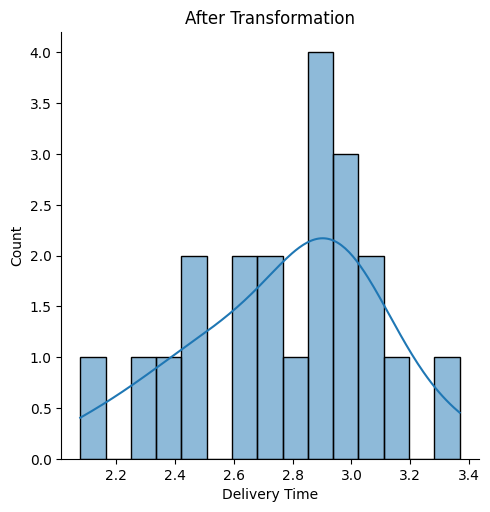

In [18]:
sns.distplot(data['Delivery Time'], bins = 15, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data['Delivery Time']), bins = 15, kde = True)
plt.title('After Transformation')
plt.show()

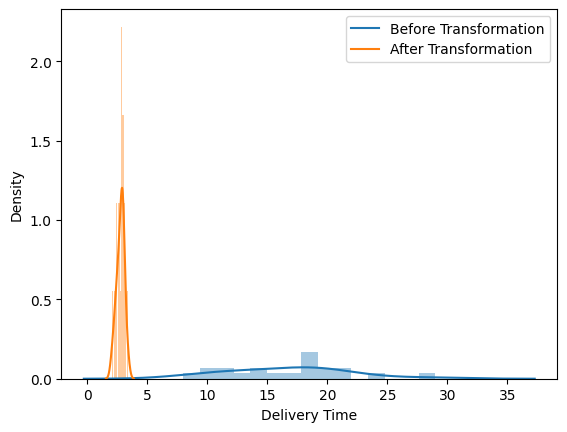

In [19]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Delivery Time'], bins = 15, kde = True)
sns.distplot(np.log(data['Delivery Time']), bins = 15, kde = True)
plt.legend(labels)
plt.show()

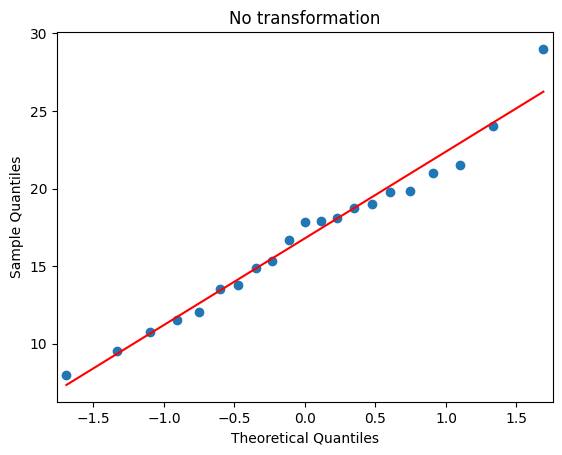

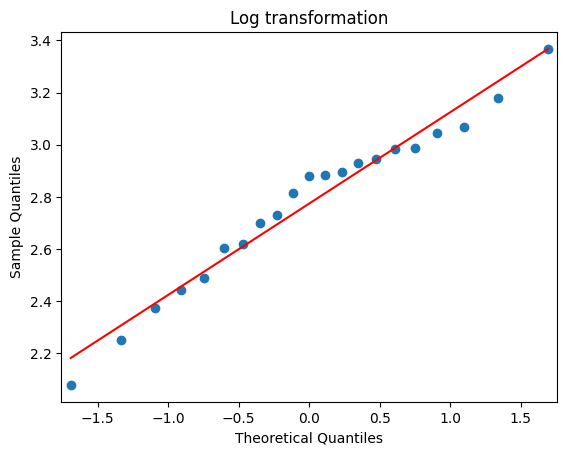

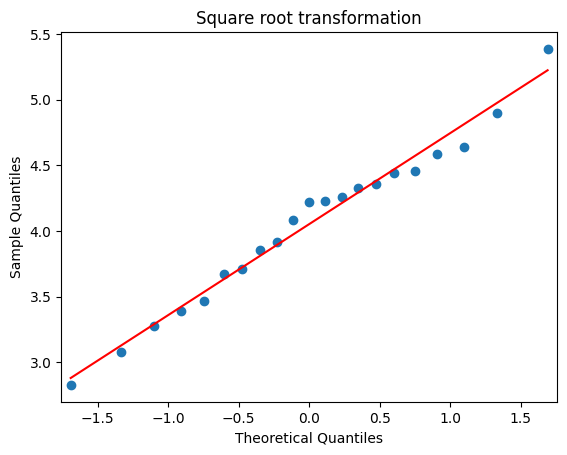

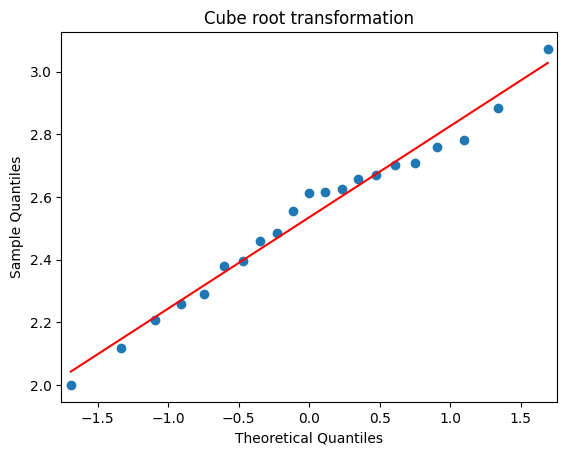

In [20]:
smf.qqplot(data['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(data['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

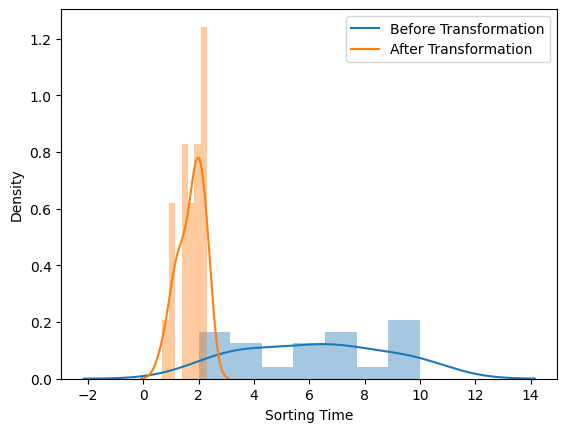

In [21]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data['Sorting Time'], bins = 7, kde = True)
sns.distplot(np.log(data['Sorting Time']), bins = 7, kde = True)
plt.legend(labels)
plt.show()

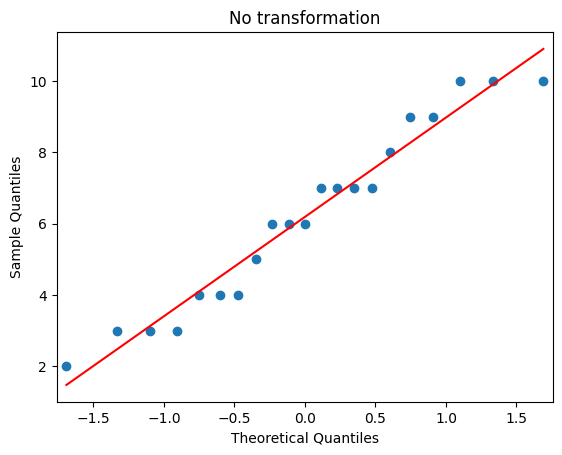

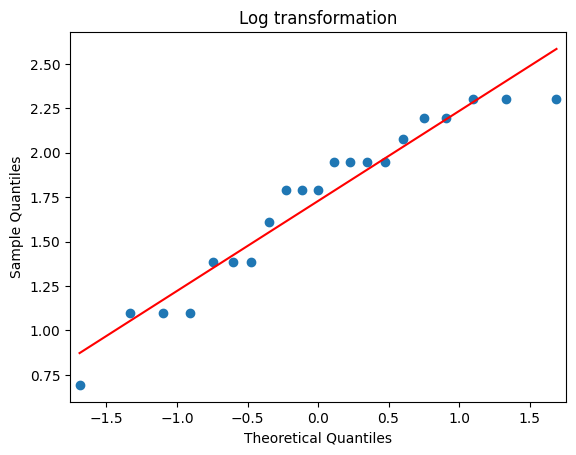

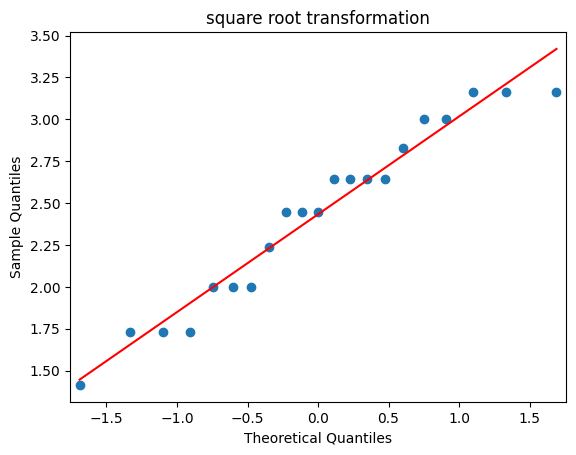

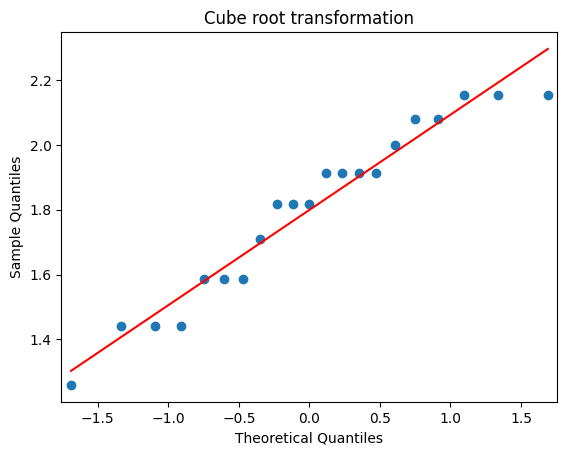

In [22]:
smf.qqplot(data['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(data['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(data['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(data['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# **We only Perform any data transformation when the data is skewed or not normal.**

In [23]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                        09:20:24   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The R-squared and Adjusted R-squared scores are still below 0.85.**

In [25]:
model1 = sm.ols('np.sqrt(Delivery_Time)~np.sqrt(Sorting_Time)', data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_Time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Thu, 13 Jul 2023   Prob (F-statistic):           8.48e-07
Time:                            09:20:28   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_Time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**After Square Root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.**

In [26]:
model2 = sm.ols('np.cbrt(Delivery_Time)~np.cbrt(Sorting_Time)', data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.cbrt(Delivery_Time)   R-squared:                       0.744
Model:                                OLS   Adj. R-squared:                  0.731
Method:                     Least Squares   F-statistic:                     55.25
Date:                    Thu, 13 Jul 2023   Prob (F-statistic):           4.90e-07
Time:                            09:20:32   Log-Likelihood:                 13.035
No. Observations:                      21   AIC:                            -22.07
Df Residuals:                          19   BIC:                            -19.98
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(Sorting_Time)     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**After Cueb root transformation on the Data, R-squared and Adjusted R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction**.

In [27]:
model3 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 13 Jul 2023   Prob (F-statistic):           1.60e-07
Time:                           09:20:36   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**After log transformation on the Data, This Model has scored the highest R-squared and Adjusted R-squared scores than the previous model, yet both Adjusted R-squared and R-squared scores are still below 0.85 which is a thumb rule we consider for a good model for prediction.**

In [28]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

**=> Here, (Intercept) Beta0 value = 6.58** & **(Sorting Time) Beta1 value = 1.64**.

=> Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (**P_value < α=0.05 ; Reject Null**).

=> Null Hypothesis as **Beta1=0 (No Slope)** and Alternate Hypthesis as **Beta1≠0 (Some or significant Slope)**.

In [29]:
print(model.tvalues,'\n',model.pvalues)

Intercept       3.823349
Sorting_Time    6.387447
dtype: float64 
 Intercept       0.001147
Sorting_Time    0.000004
dtype: float64


=> (Intercept) Beta0: tvalue=**3.82** , pvalue=**0.001147**.

=> As **(pvalue=0)<(α=0.05); Reject Null hyp**. Thus, X(Sorting Time) variable has good slope and variance w.r.t Y(Delivery Time) variable.

=> R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

In [30]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

=> Determination Coefficient = rsquared value = **0.68** ; very good fit **>= 85%**

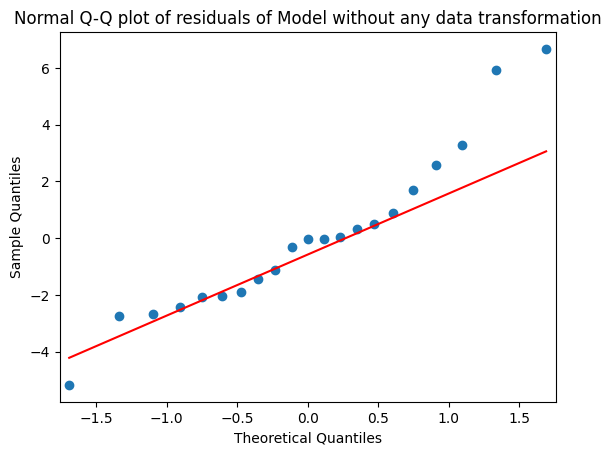

In [31]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

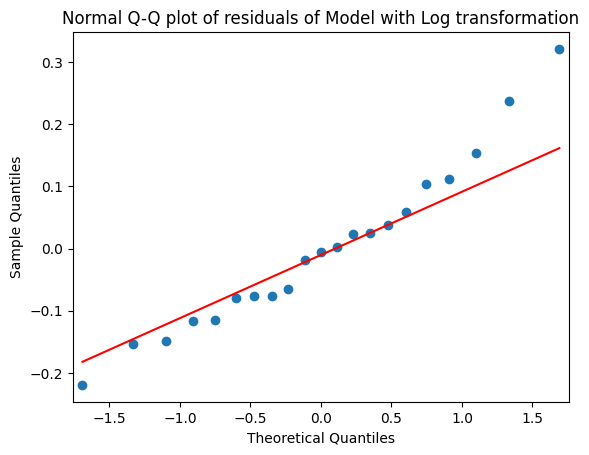

In [32]:
sm.qqplot(model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

=> Both The Model have slightly different plots.

=> The first model is right skewed and doesn't follow normal distribution.

=> The second model after log-transformation follows normal distributon with less skewness than first model.

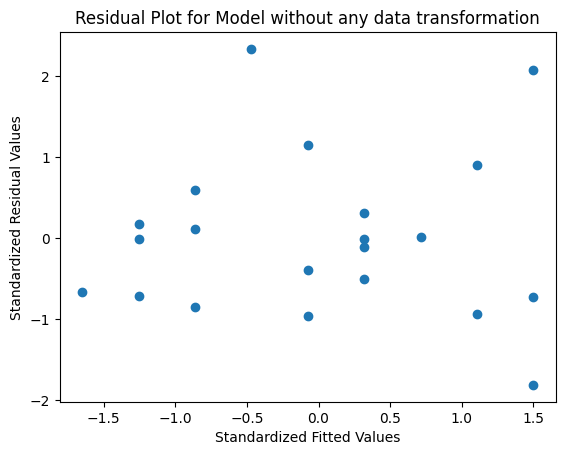

In [33]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

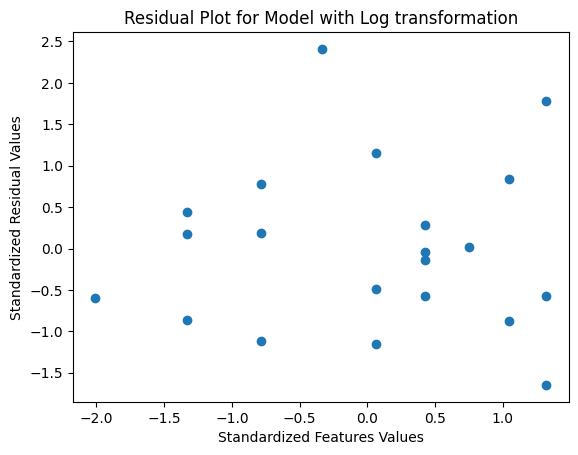

In [34]:
plt.scatter(get_standardized_values(model2.fittedvalues), get_standardized_values(model2.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

=> Both The Model have Homoscedasciticity.

=> The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.

=> Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed.

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
model1_pred_y =np.square(model1.predict(df['Sorting_Time']))
model2_pred_y =pow(model2.predict(df['Sorting_Time']),3)
model3_pred_y =np.exp(model3.predict(df['Sorting_Time']))

In [37]:
model1_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['Delivery_Time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.934903768890139 
model1= 2.762294279320867 
model2= 2.755584309893576 
model3= 2.745828897614548


In [38]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model2'

#**Model2 is the model where we did log transformation on both dependent variable as well as on independent variable**

In [39]:
pred = pd.DataFrame()
pred['Sorting_Time'] = df.Sorting_Time
pred['Delivery_Time'] = df.Delivery_Time
pred['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(pred.Sorting_Time)))
pred

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,17.035997
1,4,13.50,10.547128
2,6,19.75,12.808396
3,9,24.00,15.997918
4,10,29.00,17.035997
5,6,15.35,12.808396
6,7,19.00,13.889274
7,3,9.50,9.328887
8,10,17.90,17.035997
9,9,18.75,15.997918


#**Predicitng from Original Model without any data transformation**

In [40]:
pred1 = pd.DataFrame()
pred1['Sorting_Time'] = df.Sorting_Time
pred1['Delivery_Time'] = df.Delivery_Time
pred1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(pred1.Sorting_Time))
pred1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913
